In [7]:
# Importamos las librerías necesarias (por default que posee colab)
import time, os
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as BS

In [2]:
# Instalo el buscador (En general es lo mas problematico para el web-scraping)
!apt-get update
!apt install firefox
# Instalo buscador y la libreria selenium
!pip install selenium

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1,009 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,15

In [6]:
# De la libreria selenium importo modulos necesarios para el web-scraping
from selenium import webdriver
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver import FirefoxOptions
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [3]:
# Descargo el modulo de scrape_wunderground desde el repositorio git
url = "https://gitlab.com/mdeotoproschle/scrap_wunder/-/raw/main/scrape_wunderground.py?inline=false"
!wget --no-cache --backups=1 -O scrape_wunderground.py {url}

--2023-05-06 20:32:18--  https://gitlab.com/mdeotoproschle/scrap_wunder/-/raw/main/scrape_wunderground.py?inline=false
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10337 (10K) [application/octet-stream]
Saving to: ‘scrape_wunderground.py’

scrape_wunderground 100%[===================>]  10.09K  --.-KB/s    in 0s      

2023-05-06 20:32:18 (39.5 MB/s) - ‘scrape_wunderground.py’ saved [10337/10337]



In [10]:
# Importo la funcion descargada del git
import scrape_wunderground as scrape

In [8]:
# Informacion que se debe configurar
"""
# Defino manualmente la informacion "metadata" de estaciones cercanas a S.C. de Bariloche
# https://www.wunderground.com/wundermap?lat=-41.109&lon=-71.448
"""
estacion  = ["IDEPAR123", "IDEPAR138", "IBARIL3", "ISANCARL18", "IBARILOC6", "IBARILOC2", "ISANCARL19", "IDEPAR37", "ILOSLAGO6"]
elevacion = [  1620,    1437,    869,    775,    836,    859,    780,    932,    863]
latitud   = [-41.10,  -41.14, -41.13, -41.11, -41.08, -41.14, -41.13, -41.17, -41.00]
longitud  = [-71.57,  -71.38, -71.13, -71.42, -71.53, -71.32, -71.27, -71.37, -71.16]

"""
# Diccionario: informacion
"""
info      = {"estacion": estacion, "elevacion":elevacion, "latitud":latitud, "longitud":longitud}

"""
# Defino las fechas de interés. [Recomendacion no mas de 2 dias]
"""
date1     = "2023-05-02"
date2     = "2023-05-03"

"""
# Lista de fechas
"""
dates     = pd.date_range(date1, date2, freq='D')

"""
# Setear el direcorio de salida de la informacion
"""
pathtofolder = "."
# Carpeta de los datos y figuras
outdir       = f"{pathtofolder}/data"
os.makedirs(outdir, exist_ok = True)
# carpeta temporal donde se descargan los datos (version paralelizada)
tmpdir       = f"{outdir}/tmp"
os.makedirs(tmpdir, exist_ok = True)

# Atencion, esta la opcion de descargar el archivo config_file.py desde el repositorio
# Descargo el modulo de scrape_wunderground
#url = "https://gitlab.com/mdeotoproschle/scrap_wunder/-/raw/main/config_file.py?inline=false"
#!wget --no-cache --backups=1 -O scrape_wunderground.py {url}

# Tambien esta la opcion de descargar el codigo de plot desde el repositorio
#url = "https://gitlab.com/mdeotoproschle/scrap_wunder/-/raw/main/meteo-data.py?inline=false"
#!wget --no-cache --backups=1 -O scrape_wunderground.py {url}

In [17]:
################################################################################
# DESCARGO Y GUARDO LOS DATOS. VER ARCHIVO CONFIG_FILE
################################################################################
# # Secuencial
dataframe = scrape.download(info, dates)
# # Opcion de guardar la informacion
dataframe.to_csv(f"{outdir}/meteobari_{dates[0]:%Y%m%d}-{(dates[1] + pd.to_timedelta(1,'d')):%Y%m%d}.csv", sep=",", float_format="%.1f")

# # Con paralelizacion
#dataframe       = scrape.multidown(info, dates, tmpdir, outdir)
#dataframe.index = pd.to_datetime(dataframe.index, format = '%Y-%m-%d %H:%M')

Ok estacion IDEPAR123 y fecha 2023-05-02 00:00:00
Ok estacion IDEPAR123 y fecha 2023-05-03 00:00:00
Ok estacion IDEPAR138 y fecha 2023-05-02 00:00:00
Ok estacion IDEPAR138 y fecha 2023-05-03 00:00:00
Ok estacion IBARIL3 y fecha 2023-05-02 00:00:00
Ok estacion IBARIL3 y fecha 2023-05-03 00:00:00
Ok estacion ISANCARL18 y fecha 2023-05-02 00:00:00
Ok estacion ISANCARL18 y fecha 2023-05-03 00:00:00
Ok estacion IBARILOC6 y fecha 2023-05-02 00:00:00
Ok estacion IBARILOC6 y fecha 2023-05-03 00:00:00
Ok estacion IBARILOC2 y fecha 2023-05-02 00:00:00
Ok estacion IBARILOC2 y fecha 2023-05-03 00:00:00
Ok estacion ISANCARL19 y fecha 2023-05-02 00:00:00
Ok estacion ISANCARL19 y fecha 2023-05-03 00:00:00
Ok estacion IDEPAR37 y fecha 2023-05-02 00:00:00
Ok estacion IDEPAR37 y fecha 2023-05-03 00:00:00
Error en la lectura de la estacion ILOSLAGO6 o la fechas 2023-05-02 00:00:00
Error en la lectura de la estacion ILOSLAGO6 o la fechas 2023-05-03 00:00:00


In [12]:
# Import librerias para graficar
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter, HourLocator
from matplotlib.ticker import MultipleLocator, FormatStrFormatter


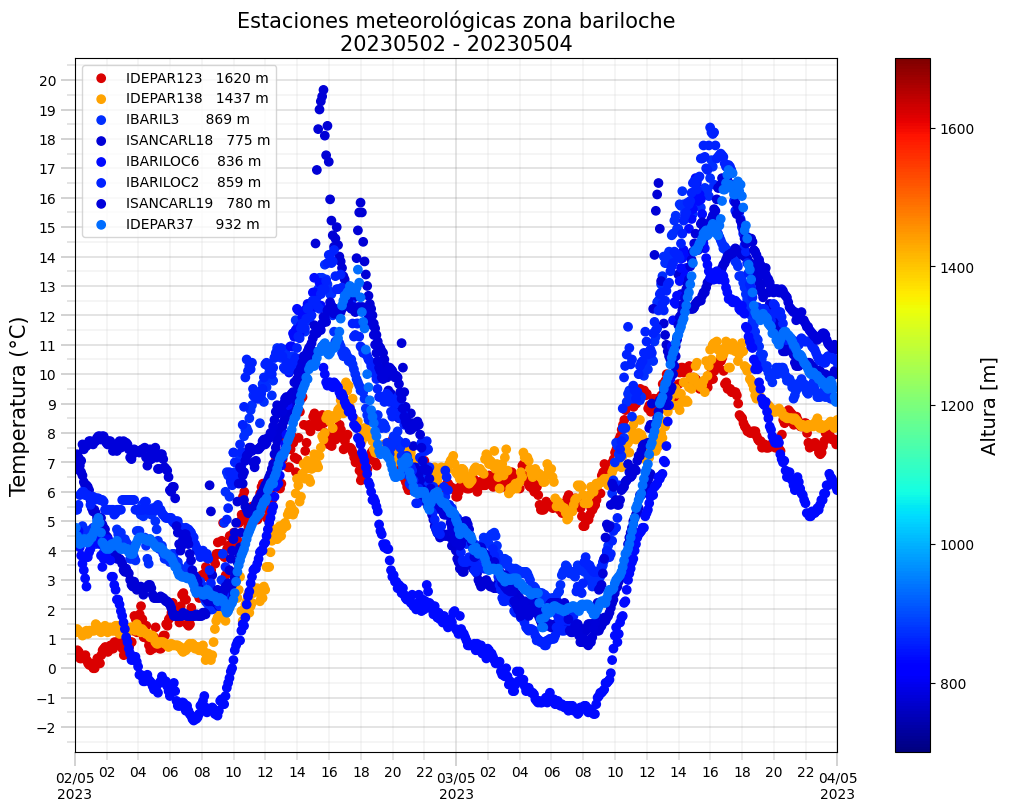

In [31]:
fig, ax = plt.subplots(figsize=(10, 8), layout='constrained')

for st in info["estacion"]:
  if not dataframe["Temperature"][dataframe["estacion"]==st].empty: # Elimino las estaciones que no tienen datos
    T    = dataframe["Temperature"][dataframe["estacion"]==st]
    elev = dataframe["elevacion"][dataframe["estacion"]==st]
    cs = ax.scatter(dataframe[dataframe["estacion"]==st].index, T, c=elev, cmap="jet", label=f"{st:10s} {elev[0]:5d} m".expandtabs(), vmin=700, vmax=1700)

#ax.set_ylim([-1,22])
ax.set_ylabel('Temperatura (°C)', fontsize=15)
ax.set_title(f"Estaciones meteorológicas zona bariloche\n{dates[0]:%Y%m%d} - {(dates[1] + pd.to_timedelta(1,'d')):%Y%m%d}", fontsize=15)     # Add a title to the axes.
ax.yaxis.set_major_locator(MultipleLocator(1.00))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(DayLocator(interval = 1))
ax.xaxis.set_minor_locator(HourLocator(interval = 2))
ax.set_xlim(dates[0], dates[1] + pd.to_timedelta(1,'d'))
ax.xaxis.set_major_formatter(DateFormatter('%d/%m\n%Y'))
ax.xaxis.set_minor_formatter(DateFormatter('%H'))
ax.yaxis.set_tick_params(labelsize = 10)
ax.xaxis.set_tick_params(labelsize = 10)
ax.grid(True, which = "major", axis = "both", ls = "-", lw = 0.3, c = "0.5")
ax.grid(True, which = "minor", axis = "both", ls = "-", lw = 0.2, c = "0.75")
ax.set_axisbelow(True)
ax.tick_params(which = 'major', width = 0.25, length = 10)
ax.tick_params(which = 'minor', width = 0.15, length = 6)
ax.legend()                     # Add a legend.

cbar = plt.colorbar(cs)
cbar.set_label('Altura [m]', rotation=90, fontsize=14)

#plt.show()
plt.savefig(f'{outdir}/plot_temp.png', bbox_inches='tight')